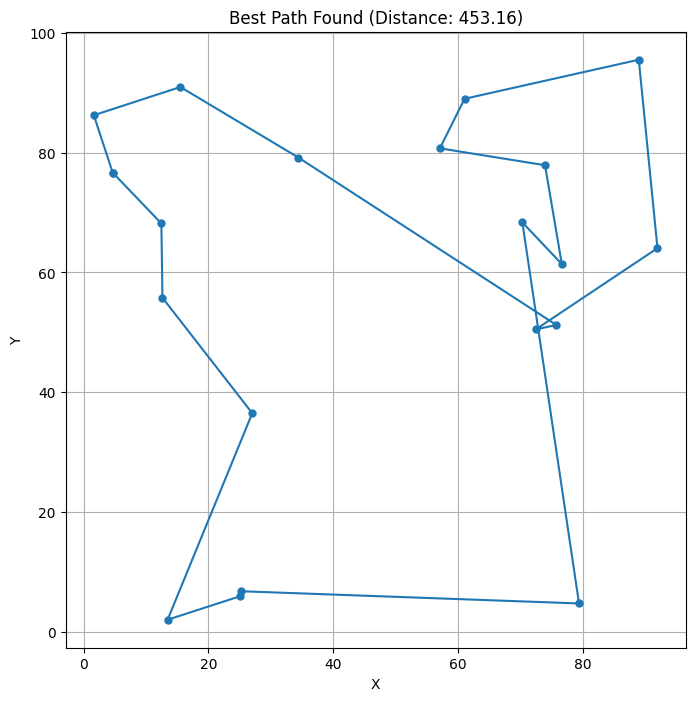

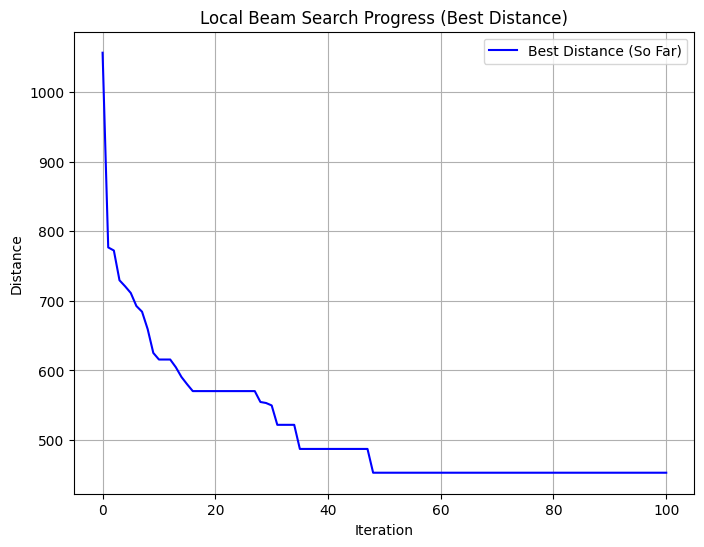

Best distance found: 453.16
Best path found: [1, 13, 14, 15, 0, 16, 11, 19, 18, 10, 7, 2, 6, 3, 17, 8, 12, 5, 4, 9]


In [1]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt

# Define the number of cities and generate random city coordinates
num_cities = 20
cities = np.random.rand(num_cities, 2) * 100  # Random coordinates in 100x100 grid

# Function to calculate the distance between two cities
def calculate_distance(city1, city2):
    return np.sqrt((city2[0] - city1[0])**2 + (city2[1] - city1[1])**2)

# Function to calculate the total distance (energy) of the path
def total_distance(path):
    dist = 0
    for i in range(len(path) - 1):
        dist += calculate_distance(cities[path[i]], cities[path[i + 1]])
    dist += calculate_distance(cities[path[-1]], cities[path[0]])  # return to the start
    return dist

# Function to generate a neighboring solution (swap two cities)
def generate_neighbor(path):
    new_path = path.copy()
    i, j = random.sample(range(len(path)), 2)
    new_path[i], new_path[j] = new_path[j], new_path[i]
    return new_path

# Local Beam Search Algorithm
def local_beam_search(cities, beam_width, iterations):
    # Initialize beams with random paths
    beams = [list(range(len(cities))) for _ in range(beam_width)]
    for beam in beams:
        random.shuffle(beam)  # Randomize the path for each beam
    
    best_path = beams[0]
    best_distance = total_distance(best_path)
    
    # List to store the best distances for visualization
    best_distances = [best_distance]
    
    for _ in range(iterations):
        new_beams = []
        for beam in beams:
            neighbors = [generate_neighbor(beam) for _ in range(beam_width)]
            best_neighbor = min(neighbors, key=total_distance)
            new_beams.append(best_neighbor)
        
        # Select the best beams based on the total distance
        beams = sorted(new_beams, key=total_distance)[:beam_width]
        
        # Update the best path and distance
        current_best = beams[0]
        current_best_distance = total_distance(current_best)
        if current_best_distance < best_distance:
            best_path = current_best
            best_distance = current_best_distance
        
        best_distances.append(best_distance)
    
    return best_path, best_distance, best_distances

# Visualization function to plot the path
def plot_path(cities, path, title):
    plt.figure(figsize=(8, 8))
    ordered_cities = cities[path + [path[0]]]
    plt.plot(ordered_cities[:, 0], ordered_cities[:, 1], 'o-', markersize=5)
    plt.title(title)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.grid(True)
    plt.show()

# Visualization of the best distances during beam search
def plot_best_distances(best_distances):
    plt.figure(figsize=(8, 6))
    plt.plot(best_distances, label='Best Distance (So Far)', color='blue')
    plt.title('Local Beam Search Progress (Best Distance)')
    plt.xlabel('Iteration')
    plt.ylabel('Distance')
    plt.grid(True)
    plt.legend()
    plt.show()

# Main Code
if __name__ == "__main__":
    # Parameters for Local Beam Search
    beam_width = 10  # Number of beams
    iterations = 100  # Number of iterations
    
    # Perform Local Beam Search to solve the TSP
    best_path, best_distance, best_distances = local_beam_search(cities, beam_width, iterations)
    
    # Visualize the best path found
    plot_path(cities, best_path, f"Best Path Found (Distance: {best_distance:.2f})")
    
    # Visualize the progress of the best distances during beam search
    plot_best_distances(best_distances)
    
    # Output the result
    print(f"Best distance found: {best_distance:.2f}")
    print(f"Best path found: {best_path}")
